# Convolutional Neural Network

In [1]:
#Importing libraries for cnn model and visulizing 
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import keras
import keras_metrics

C:\Users\Marhaba\Anaconda3\envs\New_Environment_For_Keras\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Marhaba\Anaconda3\envs\New_Environment_For_Keras\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Marhaba\Anaconda3\envs\New_Environment_For_Keras\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\User

In [2]:
#Loading data locally and preprocessing
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('PlantVillage/Training',
                                                 target_size = (96, 96),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('PlantVillage/Testing',
                                            target_size = (96, 96),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 1978 images belonging to 2 classes.
Found 496 images belonging to 2 classes.


In [3]:

#AlexNet Architecture for Pepper Health 
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(96,96,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy',keras_metrics.precision(), keras_metrics.recall()])


tracking <tf.Variable 'Variable:0' shape=() dtype=int32> tp
tracking <tf.Variable 'Variable_1:0' shape=() dtype=int32> fp
tracking <tf.Variable 'Variable_2:0' shape=() dtype=int32> tp
tracking <tf.Variable 'Variable_3:0' shape=() dtype=int32> fn
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
#Training cnn model
model = model.fit(x = training_set, validation_data = test_set, epochs = 16)


Epoch 1/16
62/62 [==============================] - 80s 1s/step - loss: 0.6969 - accuracy: 0.8276 - precision: 0.7662 - recall: 0.7730 - val_loss: 1.3758 - val_accuracy: 0.6371 - val_precision: 0.7446 - val_recall: 0.7065
Epoch 2/16
62/62 [==============================] - 77s 1s/step - loss: 0.2776 - accuracy: 0.8933 - precision: 0.9018 - recall: 0.9080 - val_loss: 2.3617 - val_accuracy: 0.6069 - val_precision: 0.6353 - val_recall: 1.0000
Epoch 3/16
62/62 [==============================] - 77s 1s/step - loss: 0.2492 - accuracy: 0.9105 - precision: 0.9083 - recall: 0.9425 - val_loss: 2.2176 - val_accuracy: 0.6190 - val_precision: 0.6295 - val_recall: 1.0000
Epoch 4/16
62/62 [==============================] - 78s 1s/step - loss: 0.1932 - accuracy: 0.9333 - precision: 0.9180 - recall: 0.9605 - val_loss: 2.3823 - val_accuracy: 0.4657 - val_precision: 0.9845 - val_recall: 0.1254
Epoch 5/16
62/62 [==============================] - 77s 1s/step - loss: 0.1795 - accuracy: 0.9312 - precision: 

In [5]:
#Testing with raw images 
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('PlantVillage/predict/healthy.jpg', target_size = (96, 96))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Healthy Pepper'
else:
  prediction = 'Bacteria Pepper'
  
print(prediction)


AttributeError: 'History' object has no attribute 'predict'

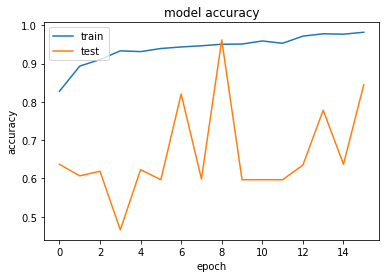

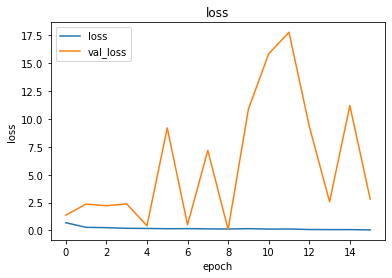

In [6]:
#Visulizing graphs for accuracy and loss
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'], loc='upper left')
plt.show()